<a href="https://colab.research.google.com/github/wi3jmu/PDS1920/blob/lecture_6/Lecture/06_Image%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class='bar_title'></div>

*Practical Data Science*

# Image Classification with Deep Learning

Matthias Griebel<br>
Chair of Information Systems and Management

Winter Semester 19/20

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Capstone-Project" data-toc-modified-id="Capstone-Project-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Capstone Project</a></span><ul class="toc-item"><li><span><a href="#The-Nature-Conservancy-Fisheries-Monitoring" data-toc-modified-id="The-Nature-Conservancy-Fisheries-Monitoring-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>The Nature Conservancy Fisheries Monitoring</a></span></li><li><span><a href="#Data-set" data-toc-modified-id="Data-set-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data set</a></span></li><li><span><a href="#Project-Overview" data-toc-modified-id="Project-Overview-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Project Overview</a></span></li></ul></li><li><span><a href="#Processing-Image-Data" data-toc-modified-id="Processing-Image-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Processing Image Data</a></span><ul class="toc-item"><li><span><a href="#Imagewoof" data-toc-modified-id="Imagewoof-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Imagewoof</a></span></li><li><span><a href="#Looking-at-the-data" data-toc-modified-id="Looking-at-the-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Looking at the data</a></span></li><li><span><a href="#Creating-an-ImageDataBunch" data-toc-modified-id="Creating-an-ImageDataBunch-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Creating an ImageDataBunch</a></span></li><li><span><a href="#The-data-block-API" data-toc-modified-id="The-data-block-API-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>The data block API</a></span></li></ul></li><li><span><a href="#Training" data-toc-modified-id="Training-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Results</a></span><ul class="toc-item"><li><span><a href="#Top-Losses" data-toc-modified-id="Top-Losses-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Top Losses</a></span></li><li><span><a href="#Confusion-Matrix" data-toc-modified-id="Confusion-Matrix-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Confusion Matrix</a></span></li></ul></li></ul></div>

__Credits__

Materials taken from
- https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson1-pets.ipynb
- https://github.com/hiromis/notes/blob/master/Lesson1.md
- https://sgugger.github.io/how-do-you-find-a-good-learning-rate.html

## Capstone Project

### The Nature Conservancy Fisheries Monitoring

From [Kaggle, 2016](https://www.kaggle.com/c/the-nature-conservancy-fisheries-monitoring)

Nearly half of the world depends on seafood for their main source of protein. In the Western and Central Pacific, where 60% of the world’s tuna is caught, illegal, unreported, and unregulated fishing practices are threatening marine ecosystems, global seafood supplies and local livelihoods. The Nature Conservancy is working with local, regional and global partners to preserve this fishery for the future.

<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/5568/media/TNC-FF-landing-page-banner.jpg" style="width:70%" />


__Problem__

Currently, the Conservancy is looking to the future by using cameras to dramatically scale the monitoring of fishing activities to fill critical science and compliance monitoring data gaps. 

Although these electronic monitoring systems work well and are ready for wider deployment, the amount of raw data produced is __cumbersome and expensive to process manually__.

__Objective__

Develop algorithms to

- automatically detect and 
- classify species

of tunas, sharks and more that fishing boats catch.

### Data set

Eight target categories are available in this dataset: six species (see below), Other (meaning that there are fish present but not in the above categories), and No Fish (meaning that no fish is in the picture). Each image has only one fish category, except that there are sometimes very small fish in the pictures that are used as bait. 

<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/5568/media/species-ref-key.jpg" style="width:70%" />


__File descriptions from Kaggle__

- train.zip - zipped folder of all train images. The train folders are organized by fish species labels.
- test_stg1.zip - zipped folder of all test images in stage 1
- test_stg2.zip - zipped folder of all test images in stage 2 (not available until the second stage of the competition)
- sample_submission_stg1.csv - a sample submission file in the correct format
- sample_submission_stg2.csv - a sample submission file in the correct format (not available until the second stage of the competition)

### Project Overview

- Deadline: 17.02.2019
- Submission as Github Repository containing at least an iPython Notebook
- Project Goals
    - Basic Image Classification 
    - Object Detection with Bounding Boxes or Segmentation Masks
    - Submissions to Kaggle (Score Reporting)
- Form and structure should be similar to seminar papers or theses
    - Containing explanations, figures, tables, and code
    - Avoid large code blocks by modularization/outsourcing

__Notes__

- Please assign yourself to a github group repository (link on wuecampus)
- You will need a Kaggle Account to download the data
- Use the Kaggle API to download the data, e.g, [to Google Colab](https://www.kaggle.com/general/74235)
- You may use Google Drive to store models and data ([link](https://colab.research.google.com/notebooks/io.ipynb))

## Processing Image Data

__Hardware: Graphics Processing Unit (GPU)__

GPU is fit for training the deep learning systems in a long run for very large datasets. CPU can train a deep learning model quite slowly. GPU accelerates the training of the model. Hence, GPU is a better choice to train the Deep Learning Model efficiently and effectively ([Medium](https://medium.com/@shachishah.ce/do-we-really-need-gpu-for-deep-learning-47042c02efe2)).

Make sure your GPU environment is set up and you can run Jupyter Notebook.

__GPU on [Google Colab](http://colab.research.google.com)___

* Select 'Runtime' -> 'Change runtime time' -> 'Python 3' (and 'GPU') before running the notebook.

We are going to work with the fastai V1 library which sits on top of Pytorch 1.0. The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.

In [0]:
from fastai import *
from fastai.vision import *

If you're using a computer with an unusually small GPU, you may get an out of memory error when running this notebook. If this happens, click Runtime->Restart, uncomment the 2nd line below to use a smaller batch size (you'll learn all about what this means during the course), and try again.

In [0]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

### Imagewoof

We are going to use the [Imagewoof](https://github.com/fastai/imagenette) data set, a subset of 10 classes from Imagenet that aren't so easy to classify, since they're all dog breeds. 

The breeds are: Australian terrier, Border terrier, Samoyed, Beagle, Shih-Tzu, English foxhound, Rhodesian ridgeback, Dingo, Golden retriever, Old English sheepdog. 

__Download and extract__

The first thing we have to do is download and extract the data that we want. `untar_data` will download that to some convenient path and untar it for us and it will then return the value of path.

In [3]:
# URLs.IMAGEWOOF_160 = 'https://s3.amazonaws.com/fast-ai-imageclas/imagewoof-160'
path = untar_data(URLs.IMAGEWOOF_160); path

PosixPath('/root/.fastai/data/imagewoof-160')

Next time you run this, since you've already downloaded it, it won't download it again. Since you've already untared it, it won't untar it again. So everything is designed to be pretty automatic and easy.

### Looking at the data

The first thing we do when we approach a problem is to take a look at the data. We always need to understand very well what the problem is and what the data looks like before we can figure out how to solve it. Taking a look at the data means understanding how the data directories are structured, what the labels are and what some sample images look like.

__Python 3 pathlib__

For convenience, fast.ai adds functionality into existing Python stuff. One of these things is add a `ls()` method to path.

In [4]:
path.ls()

[PosixPath('/root/.fastai/data/imagewoof-160/train'),
 PosixPath('/root/.fastai/data/imagewoof-160/val')]

Path objects from the [pathlib](https://docs.python.org/3/library/pathlib.html) module are much better to use than strings. It doesn't matter if you're on Windows, Linux, or Mac. It is always going to work exactly the same way.

We can also list the directory and all subdirectories of the path. 
- `Sorted` returns a new list containing all items from the iterable in ascending order
- `glob` the given relative pattern in the directory represented by this path, yielding all matching files (of any kind)
- The `**` pattern means "this directory and all subdirectories, recursively"

In [5]:
sorted(path.glob('**'))

[PosixPath('/root/.fastai/data/imagewoof-160'),
 PosixPath('/root/.fastai/data/imagewoof-160/train'),
 PosixPath('/root/.fastai/data/imagewoof-160/train/n02086240'),
 PosixPath('/root/.fastai/data/imagewoof-160/train/n02087394'),
 PosixPath('/root/.fastai/data/imagewoof-160/train/n02088364'),
 PosixPath('/root/.fastai/data/imagewoof-160/train/n02089973'),
 PosixPath('/root/.fastai/data/imagewoof-160/train/n02093754'),
 PosixPath('/root/.fastai/data/imagewoof-160/train/n02096294'),
 PosixPath('/root/.fastai/data/imagewoof-160/train/n02099601'),
 PosixPath('/root/.fastai/data/imagewoof-160/train/n02105641'),
 PosixPath('/root/.fastai/data/imagewoof-160/train/n02111889'),
 PosixPath('/root/.fastai/data/imagewoof-160/train/n02115641'),
 PosixPath('/root/.fastai/data/imagewoof-160/val'),
 PosixPath('/root/.fastai/data/imagewoof-160/val/n02086240'),
 PosixPath('/root/.fastai/data/imagewoof-160/val/n02087394'),
 PosixPath('/root/.fastai/data/imagewoof-160/val/n02088364'),
 PosixPath('/root/.f

__get_image_files__

`get_image_files` will just grab an array of all of the image files based on extension in a path.

In [6]:
fnames = get_image_files(path/'train/n02115641')
fnames[:5]

[PosixPath('/root/.fastai/data/imagewoof-160/train/n02115641/n02115641_8871.JPEG'),
 PosixPath('/root/.fastai/data/imagewoof-160/train/n02115641/n02115641_8729.JPEG'),
 PosixPath('/root/.fastai/data/imagewoof-160/train/n02115641/n02115641_1844.JPEG'),
 PosixPath('/root/.fastai/data/imagewoof-160/train/n02115641/n02115641_11310.JPEG'),
 PosixPath('/root/.fastai/data/imagewoof-160/train/n02115641/n02115641_581.JPEG')]

Here, 'n02115641' refers to the class _dingo_ in [imagenet](https://gist.github.com/aaronpolhamus/964a4411c0906315deb9f4a3723aac57).

### Creating an ImageDataBunch

The main difference between the handling of image classification datasets is the way labels are stored. In this particular dataset, labels are stored in the names of the (sub-)folders. We will need to extract them to be able to classify the images into the correct categories.

In fast.ai, there is an object called ImageDataBunch. An ImageDataBunch represents all of the data you need to build a model. It has a handy function made exactly for this, `ImageDataBunch.label_from_folder` gets the labels from the foldernames.

In [0]:
data = ImageDataBunch.from_folder(path, 
                                  ds_tfms=get_transforms(),
                                  valid='val',
                                  size=224,
                                  bs=64,
                                  ).normalize(imagenet_stats)

In [8]:
data.classes

['n02086240',
 'n02087394',
 'n02088364',
 'n02089973',
 'n02093754',
 'n02096294',
 'n02099601',
 'n02105641',
 'n02111889',
 'n02115641']

### The data block API

The [data block API](https://docs.fast.ai/data_block.html#The-data-block-API) lets you customize the creation of a DataBunch by isolating the underlying parts of that process in separate blocks, mainly:

1. Where are the inputs and how to create them?
2. How to split the data into a training and validation sets?
3. How to label the inputs?
4. What transforms to apply?
5. How to add a test set?
6. How to wrap in dataloaders and create the DataBunch?

Each of these may be addressed with a specific block designed for your unique setup. Your inputs might be in a folder, a csv file, or a dataframe. You may want to split them randomly, by certain indices or depending on the folder they are in. You can have your labels in your csv file or your dataframe, but it may come from folders or a specific function of the input. You may choose to add data augmentation or not. A test set is optional too. Finally you have to set the arguments to put the data together in a DataBunch (batch size, collate function...)

First, we define a dictionary for the labels:

In [0]:
dogs_dict = { 'n02086240': 'Shih-Tzu',
              'n02087394': 'Rhodesian_ridgeback',
              'n02088364': 'beagle',
              'n02089973': 'English_foxhound',
              'n02093754': 'Border_terrier',
              'n02096294': 'Australian_terrier',
              'n02099601': 'golden_retriever',
              'n02105641': 'Old_English_sheepdog',
              'n02111889': 'Samoyed',
              'n02115641': 'dingo',
              }

Now, let's create start using the data block API

In [0]:
src = (ImageList.from_folder(path)
      .split_by_folder(valid = 'val')
      .label_from_func(lambda x: dogs_dict[x.parent.name]))

In [0]:
data = (src.transform(get_transforms(), size=224)
            .databunch(bs=bs)
            .normalize(imagenet_stats))

In [12]:
data.classes

['Australian_terrier',
 'Border_terrier',
 'English_foxhound',
 'Old_English_sheepdog',
 'Rhodesian_ridgeback',
 'Samoyed',
 'Shih-Tzu',
 'beagle',
 'dingo',
 'golden_retriever']

__data.show_batch__

Let's take a look at a few pictures. `data.show_batch` can be used to show me some of the contents  So you can see roughly what's happened is that they all seem to have being zoomed and cropped in a reasonably nice way.

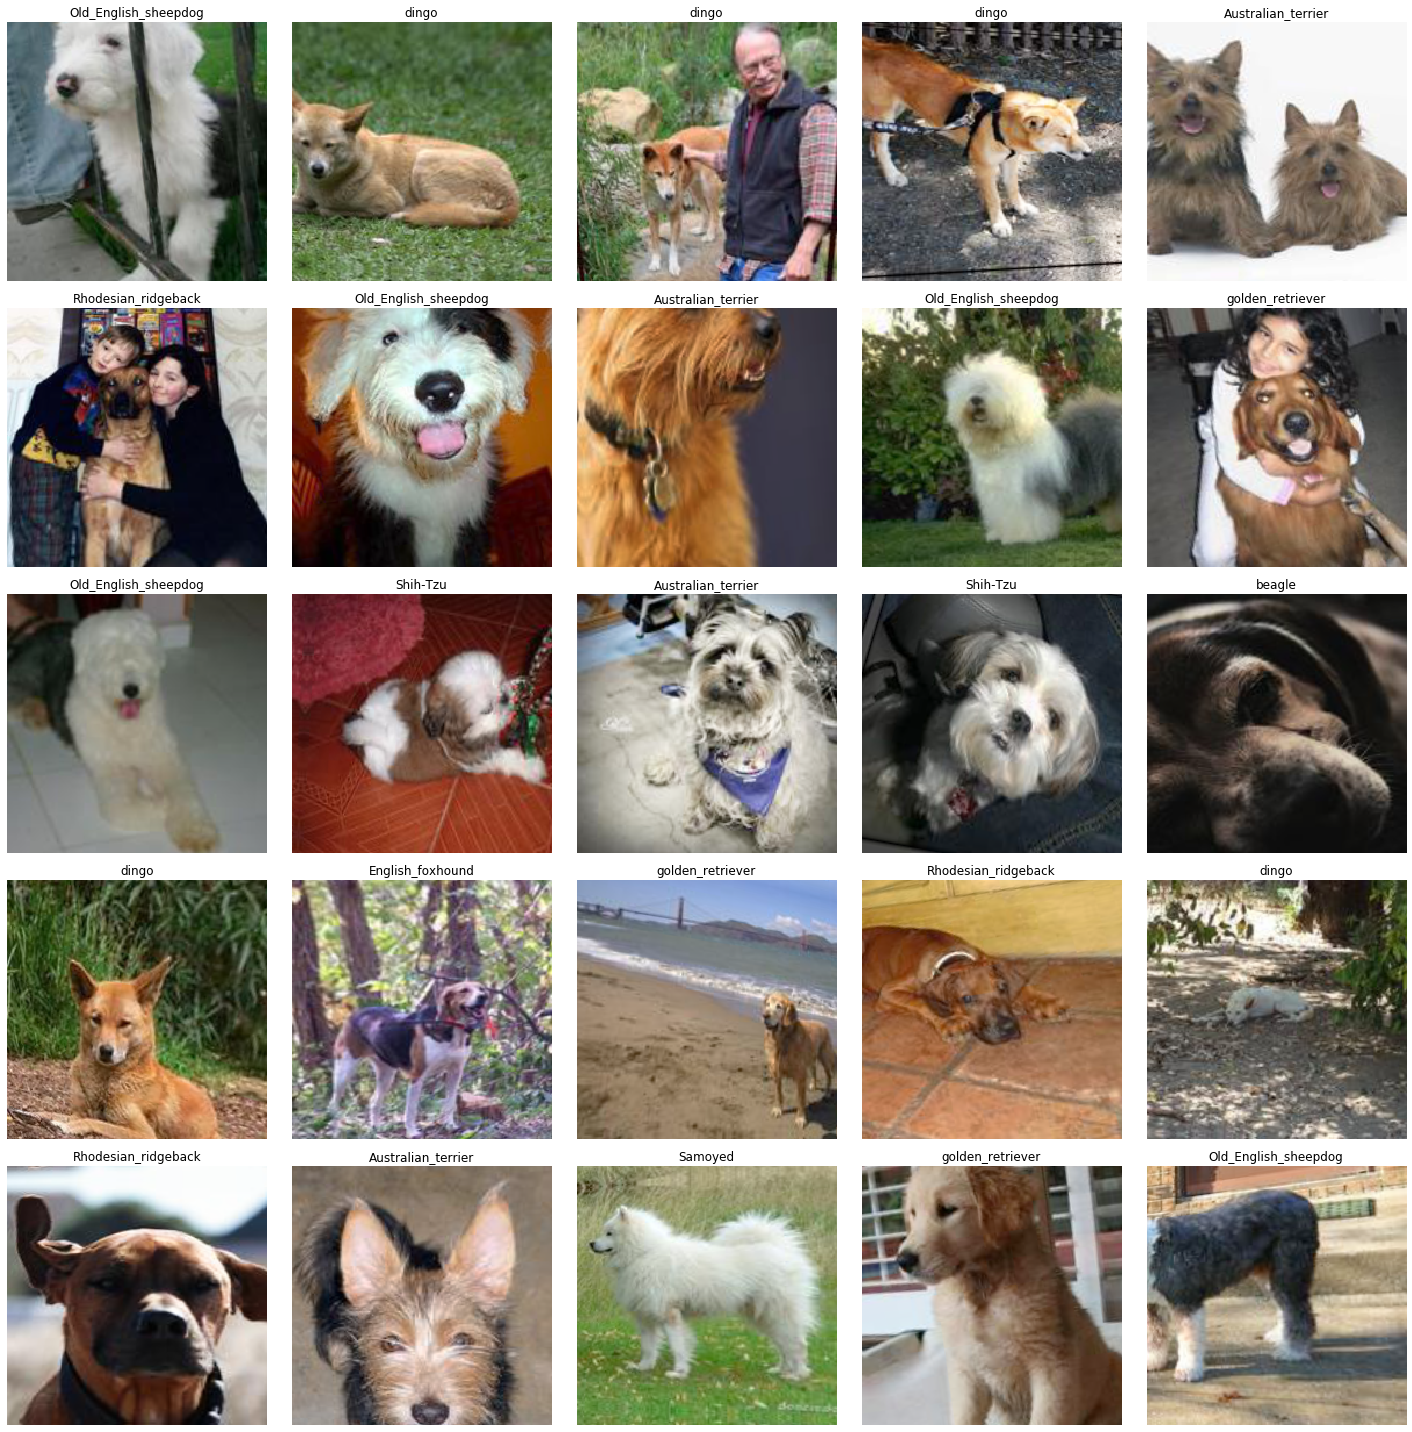

In [13]:
data.show_batch()

## Training

Now we will start training our model. We will use a convolutional neural network backbone and a fully connected head with a single hidden layer as a classifier. 

### The cnn_learner

This method creates a Learner object from the data object and model inferred from it with the backbone given in `base_arch`.

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

- __data__: takes a data bunch. 
- __metrics__: error rate (1-accuracy)
- __arch__: architecture. There are lots of different ways of constructing a convolutional neural network. For now, the most important thing for you to know is that there's a particular kind of model called ResNet which works extremely well nearly all the time. For a while, at least, you really only need to be doing choosing between two things which is what size ResNet do you want. There are ResNet34 and ResNet50. 

Let's print a summary of the model.

In [32]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     False     
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
ReLU                 [64, 56, 56]         0          False     
___________________________________________________

__Resnet Architecture__

<img src="https://miro.medium.com/max/1314/1*S3TlG0XpQZSIpoDIUCQ0RQ.jpeg" style="width:70%" />



### Find the learning rate

Please read the fast.ai [lr_finder docs](https://docs.fast.ai/callbacks.lr_finder.html). Also, Sylvain Gugger from the fast.ai team wrote a nice [blog post](https://sgugger.github.io/how-do-you-find-a-good-learning-rate.html) on how to find  good learning rate.

In [33]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.74E-03
Min loss divided by 10: 8.32E-03


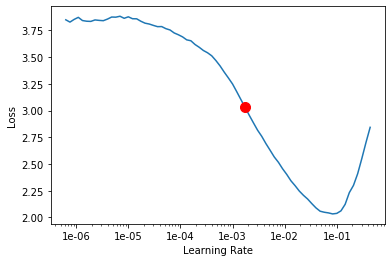

In [34]:
learn.recorder.plot(suggestion=True)

### Fit the model

Fit the model based on selected learning rate

In [35]:
learn.fit_one_cycle(2, max_lr=1E-03)

In [0]:
learn.save('stage-1')

So far we have fitted 2 epochs and it ran pretty quickly. Why is that so? Because we used a little trick (called transfer learning).

What did we do?
We added a few extra layers at the end of architecture, and we only trained those. We left most of the early layers as they were. This is called freezing layers i.e weights of the layers.

- When we call fit or `fit_one_cycle()` on a create_cnn, it will just fine-tune these extra layers at the end, and run very fast.
- To get a better model, we have to call `unfreeze()` to train the whole model.

### Unfreeze and train again

Since our model is working as we expect it to, we will unfreeze our model and train some more.

In [0]:
learn.unfreeze()

In [38]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


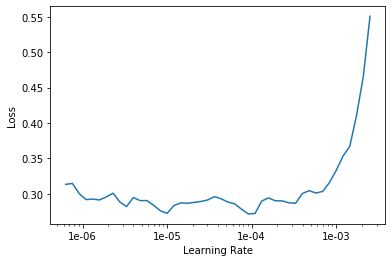

In [39]:
learn.recorder.plot()

__Learning rates after unfreezing__

The basic rule of thumb is after you unfreeze (i.e. train the whole thing), pass a max learning rate parameter, pass it a slice, make the second part of that slice about 10 times smaller than your first stage.

In [40]:
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-4))

The model seems to overfit after three epochs. So we can reload stage 1 and train the model again for only three epochs.

In [0]:
learn = learn.load('stage-1')
learn.unfreeze()

In [57]:
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

## Results

It’s important to see what comes out of our model. We have seen one way of what goes in, now let’s see what our model has predicted.

The `ClassificationInterpretation` class has methods for creating confusion matrix as well as plotting misclassified images.

In [58]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

### Top Losses

We will first see which were the categories that the model most confused with one another. We will try to see if what the model predicted was reasonable or not.

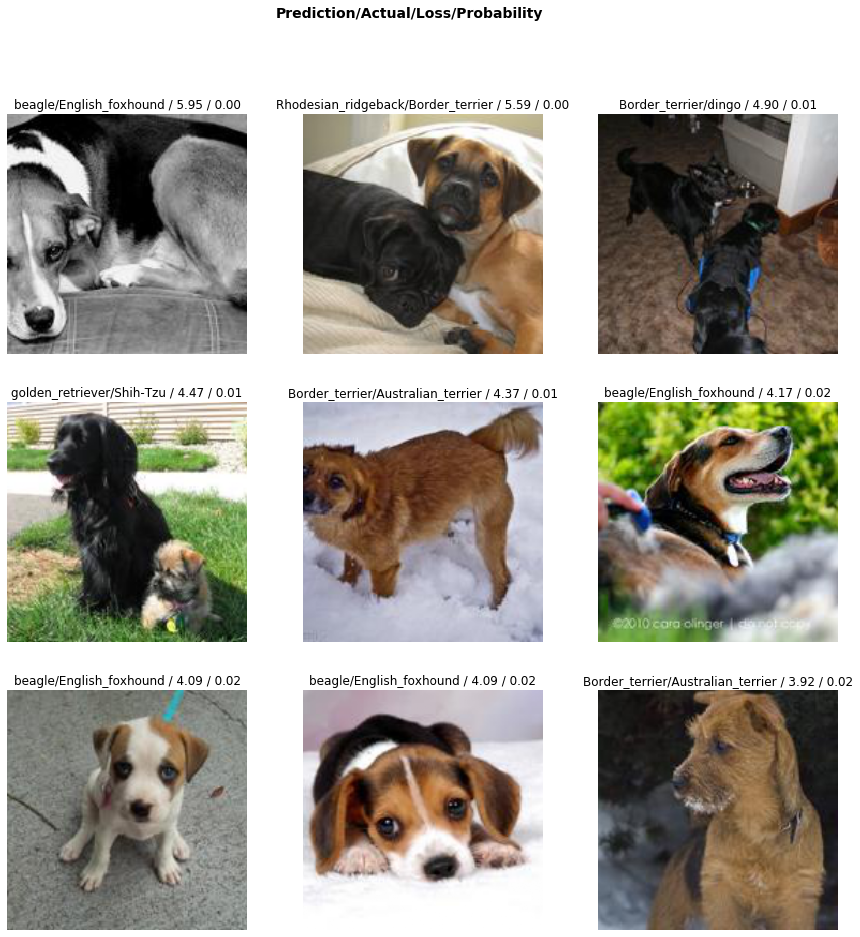

In [59]:
interp.plot_top_losses(9, figsize=(15,15))

### Confusion Matrix

Furthermore, when we plot the confusion matrix. Interestingly, the model often confuses English Foxhounds with Beagles. This confirmes that our model works very well until a certain level as these two dog breeds look very similar.

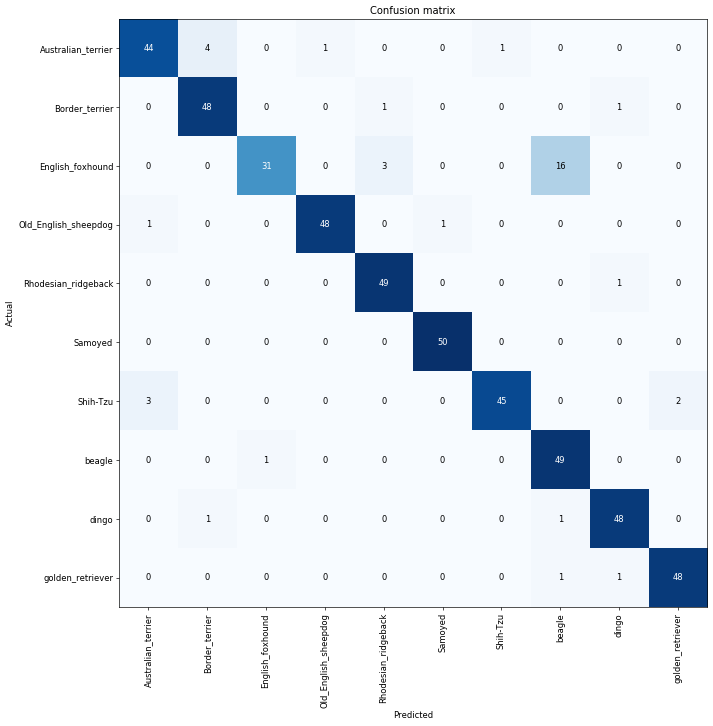

In [60]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

__Most Confused__

Sorted descending list of largest non-diagonal entries of confusion matrix, presented as actual, predicted, number of occurrences.

In [61]:
interp.most_confused(min_val=2)

[('English_foxhound', 'beagle', 16),
 ('Australian_terrier', 'Border_terrier', 4),
 ('English_foxhound', 'Rhodesian_ridgeback', 3),
 ('Shih-Tzu', 'Australian_terrier', 3),
 ('Shih-Tzu', 'golden_retriever', 2)]